<a href="https://colab.research.google.com/github/prajuktadey/AQI-Prediction/blob/main/AQIPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Air_quality data.csv to Air_quality data.csv


In [3]:
df=pd.read_csv('Air_quality data.csv',encoding='unicode_escape',on_bad_lines='skip')
# Reading the dataset

In [4]:
df.head
# Gets the data from the dataset

<bound method NDFrame.head of        stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               Andhra Pradesh  Hyderabad   
1         151.0  February - M021990               Andhra Pradesh  Hyderabad   
2         152.0  February - M021990               Andhra Pradesh  Hyderabad   
3         150.0     March - M031990               Andhra Pradesh  Hyderabad   
4         151.0     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                     

In [5]:
df.head(20)
# displaying basic information about the dataset provided(first 20)

stn_code       sampling_date           state   location agency  \
0     150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1     151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2     152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3     150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4     151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
5     152.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
6     150.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
7     151.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
8     152.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
9     151.0       May - M051990  Andhra Pradesh  Hyderabad    NaN   
10    152.0       May - M051990  Andhra Pradesh  Hyderabad    NaN   
11    150.0      June - M061990  Andhra Pradesh  Hyderabad    NaN   
12    151.0      June - M061990  Andhra Pradesh  Hyderabad    NaN   
13    152.0      June - M061990  Andhra Pradesh  Hyderabad    NaN   
14    150.0      July - M071990  Andhra Pradesh  Hyderabad    NaN   
15    152.0      July - M071990  Andhra Pradesh  Hyderabad    NaN   
16    151.0      July - M071990  Andhra Pradesh  Hyderabad    NaN   
17    150.0    August - M081990  Andhra Pradesh  Hyderabad    NaN   
18    151.0    August - M081990  Andhra Pradesh  Hyderabad    NaN   
19    152.0    August - M081990  Andhra Pradesh  Hyderabad    NaN   

                                  type   so2   no2  rspm    spm  \
0   Residential, Rural and other Areas   4.8  17.4   NaN    NaN   
1                      Industrial Area   3.1   7.0   NaN    NaN   
2   Residential, Rural and other Areas   6.2  28.5   NaN    NaN   
3   Residential, Rural and other Areas   6.3  14.7   NaN    NaN   
4                      Industrial Area   4.7   7.5   NaN    NaN   
5   Residential, Rural and other Areas   6.4  25.7   NaN    NaN   
6   Residential, Rural and other Areas   5.4  17.1   NaN    NaN   
7                      Industrial Area   4.7   8.7   NaN    NaN   
8   Residential, Rural and other Areas   4.2  23.0   NaN    NaN   
9                      Industrial Area   4.0   8.9   NaN    NaN   
10  Residential, Rural and other Areas   3.6  18.6   NaN    NaN   
11  Residential, Rural and other Areas   3.9  14.1   NaN  133.0   
12                     Industrial Area   5.6  11.8   NaN   82.0   
13  Residential, Rural and other Areas   3.3  19.3   NaN  111.0   
14  Residential, Rural and other Areas   3.9   8.2   NaN  118.0   
15  Residential, Rural and other Areas   3.5  12.1   NaN  135.0   
16                     Industrial Area   7.9  10.2   NaN   80.0   
17  Residential, Rural and other Areas   4.0   9.9   NaN  179.0   
18                     Industrial Area  12.4  11.5   NaN   58.0   
19  Residential, Rural and other Areas   4.0  12.3   NaN   99.0   

   location_monitoring_station  pm2_5        date  
0                          NaN    NaN  1990-02-01  
1                          NaN    NaN  1990-02-01  
2                          NaN    NaN  1990-02-01  
3                          NaN    NaN  1990-03-01  
4                          NaN    NaN  1990-03-01  
5                          NaN    NaN  1990-03-01  
6                          NaN    NaN  1990-04-01  
7                          NaN    NaN  1990-04-01  
8                          NaN    NaN  1990-04-01  
9                          NaN    NaN  1990-05-01  
10                         NaN    NaN  1990-05-01  
11                         NaN    NaN  1990-06-01  
12                         NaN    NaN  1990-06-01  
13                         NaN    NaN  1990-06-01  
14                         NaN    NaN  1990-07-01  
15                         NaN    NaN  1990-07-01  
16                         NaN    NaN  1990-07-01  
17                         NaN    NaN  1990-08-01  
18                         NaN    NaN  1990-08-01  
19                         NaN    NaN  1990-08-01

In [19]:
df.shape
# There are 435742 rows and 13 columns in the dataset

(435742, 13)

In [20]:
df.columns
# These are all the names of the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [8]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [17]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

In [18]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [13]:
df.info(memory_usage='deep')
# Returns the memory usage of each column in bytes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [16]:
df.duplicated()
# checking for duplicate data

0         False
1         False
2         False
3         False
4         False
          ...  
435737    False
435738    False
435739    False
435740    False
435741    False
Length: 435742, dtype: bool

**Data Visualization**

In [22]:
df['state'].value_counts()
# Viewing the count of values present in the state column

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

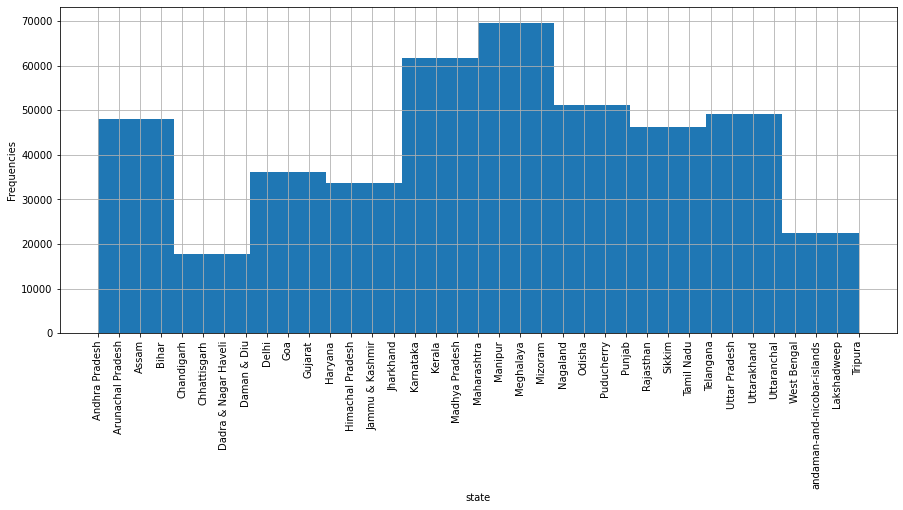

In [23]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
sns.set_theme(style="darkgrid")
# The visualization shows us the count of states present in the dataset.

In [24]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

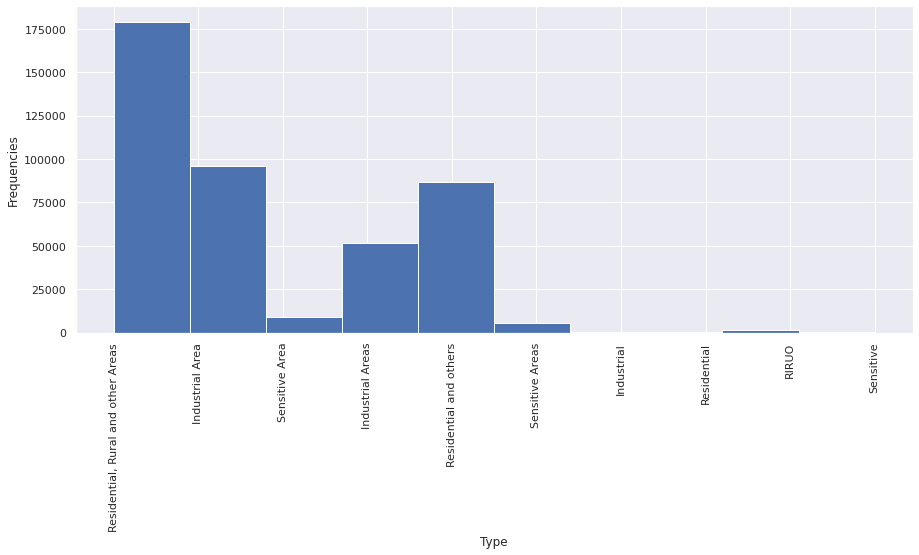

In [25]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
sns.set_theme(style="darkgrid")
# The visualization shows us the count of Types present in the dataset.

In [26]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

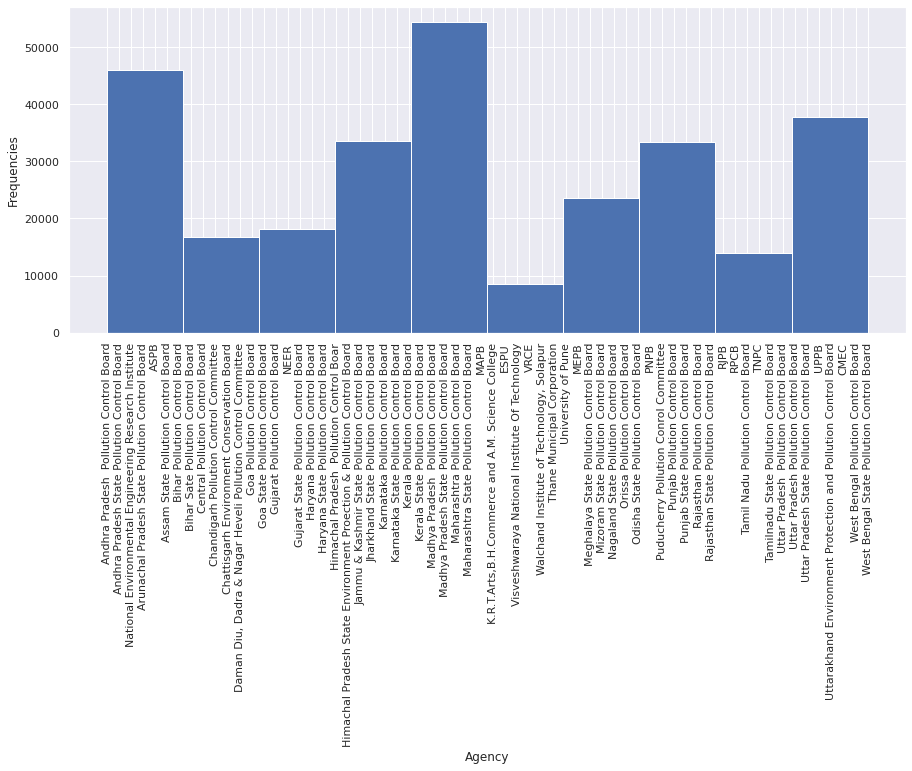

In [27]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

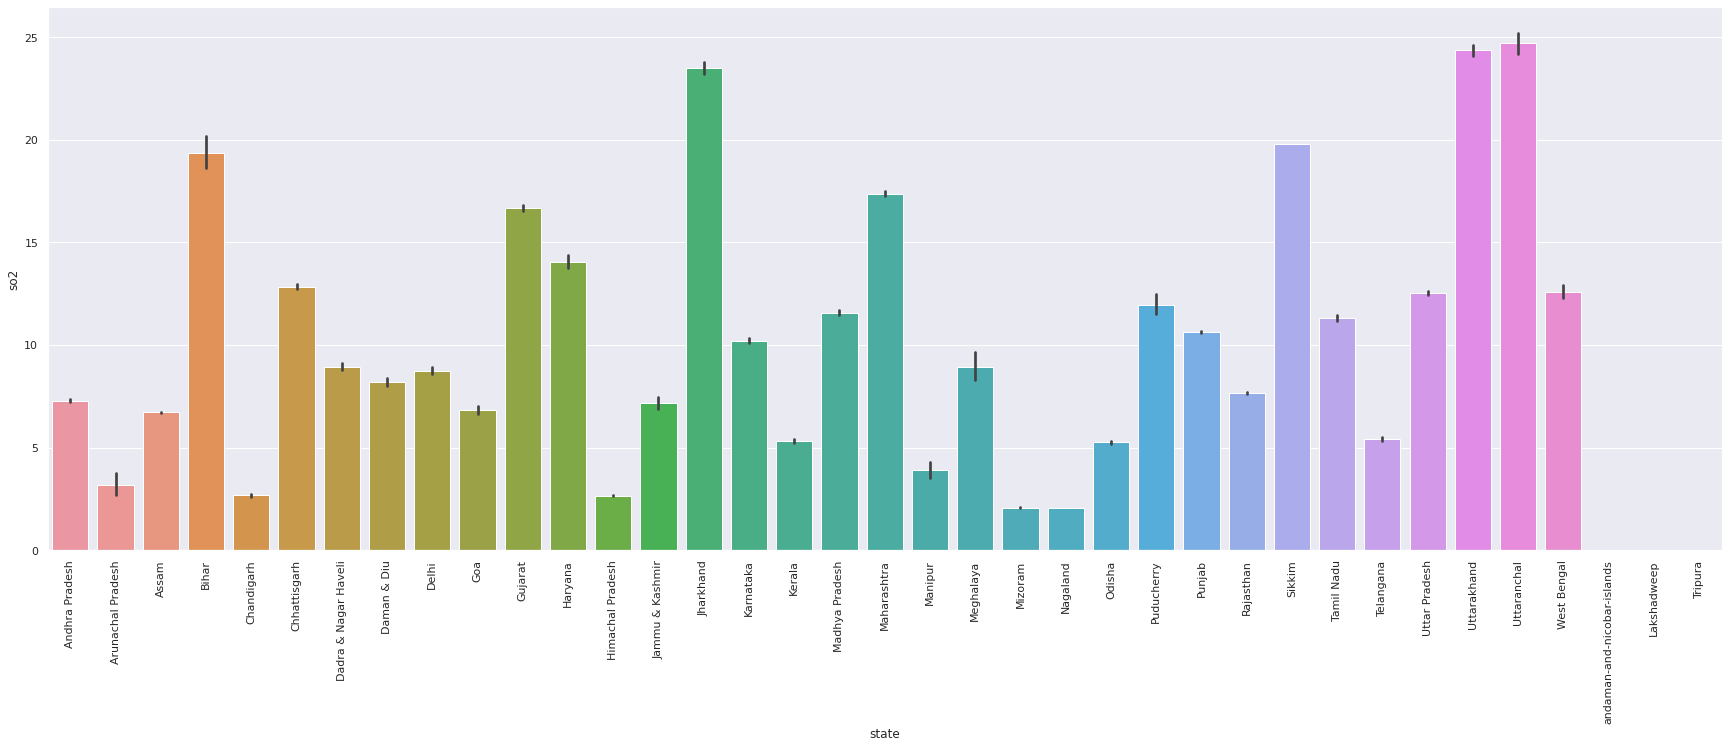

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
sns.set_theme(style="darkgrid")
# Uttaranchal has the highest concentration of so2 in the air.

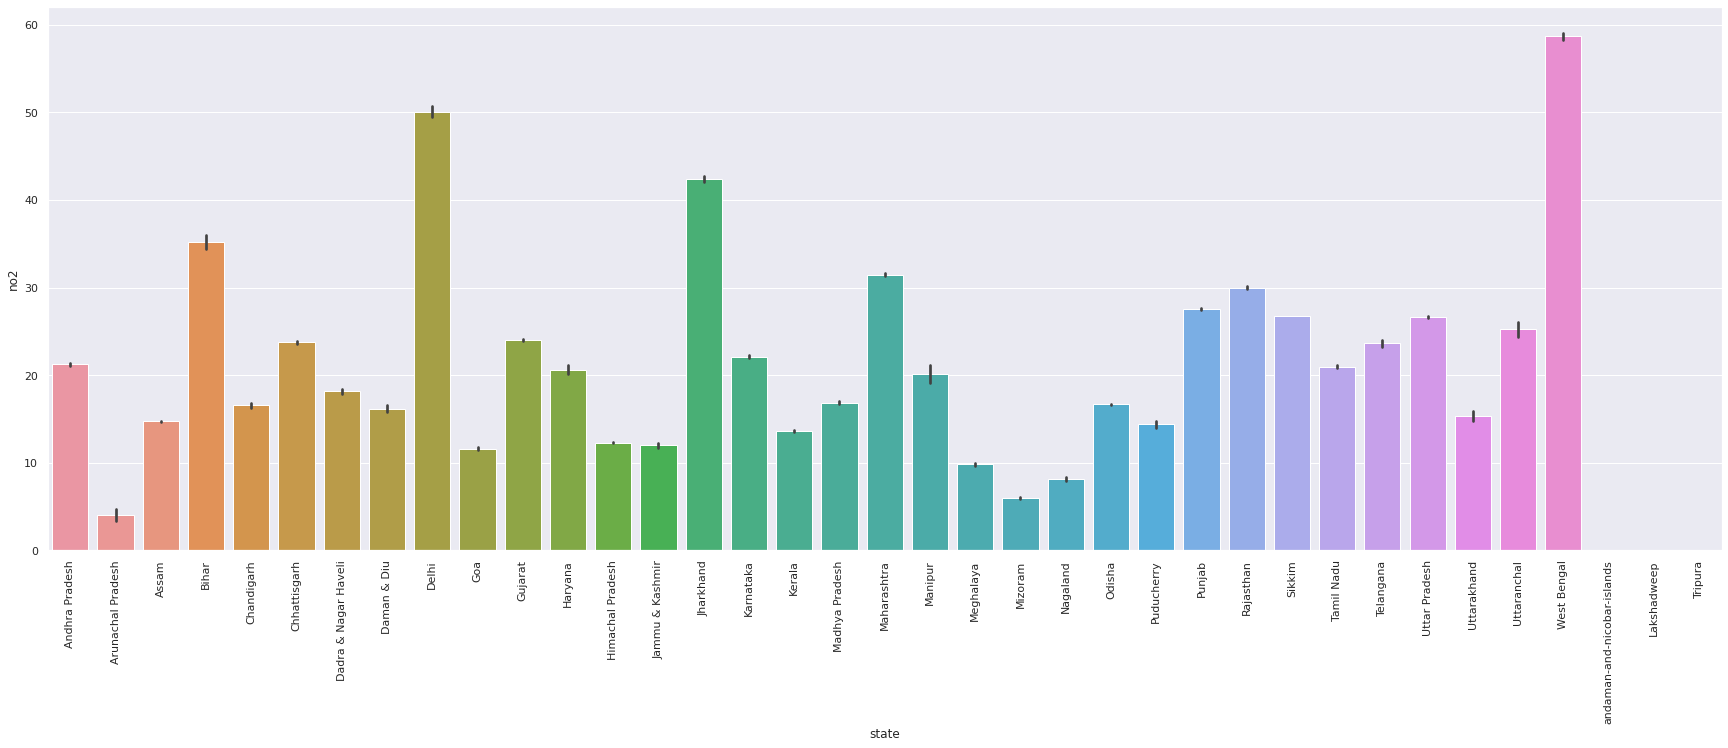

In [130]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
sns.set_theme(style="darkgrid")
# West Bengal has the higest concentration of no2 in the air followed by Delhi and Jharkhand.

<Figure size 4320x5760 with 0 Axes>

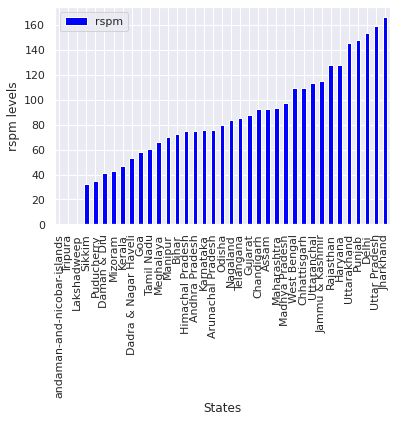

In [138]:
plt.figure(figsize=(60, 80))
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='blue')
plt.xlabel('States')
plt.ylabel('rspm levels')
plt.show()
# Below we get a clear picture of the states in an ascending order based on their rspm levels.

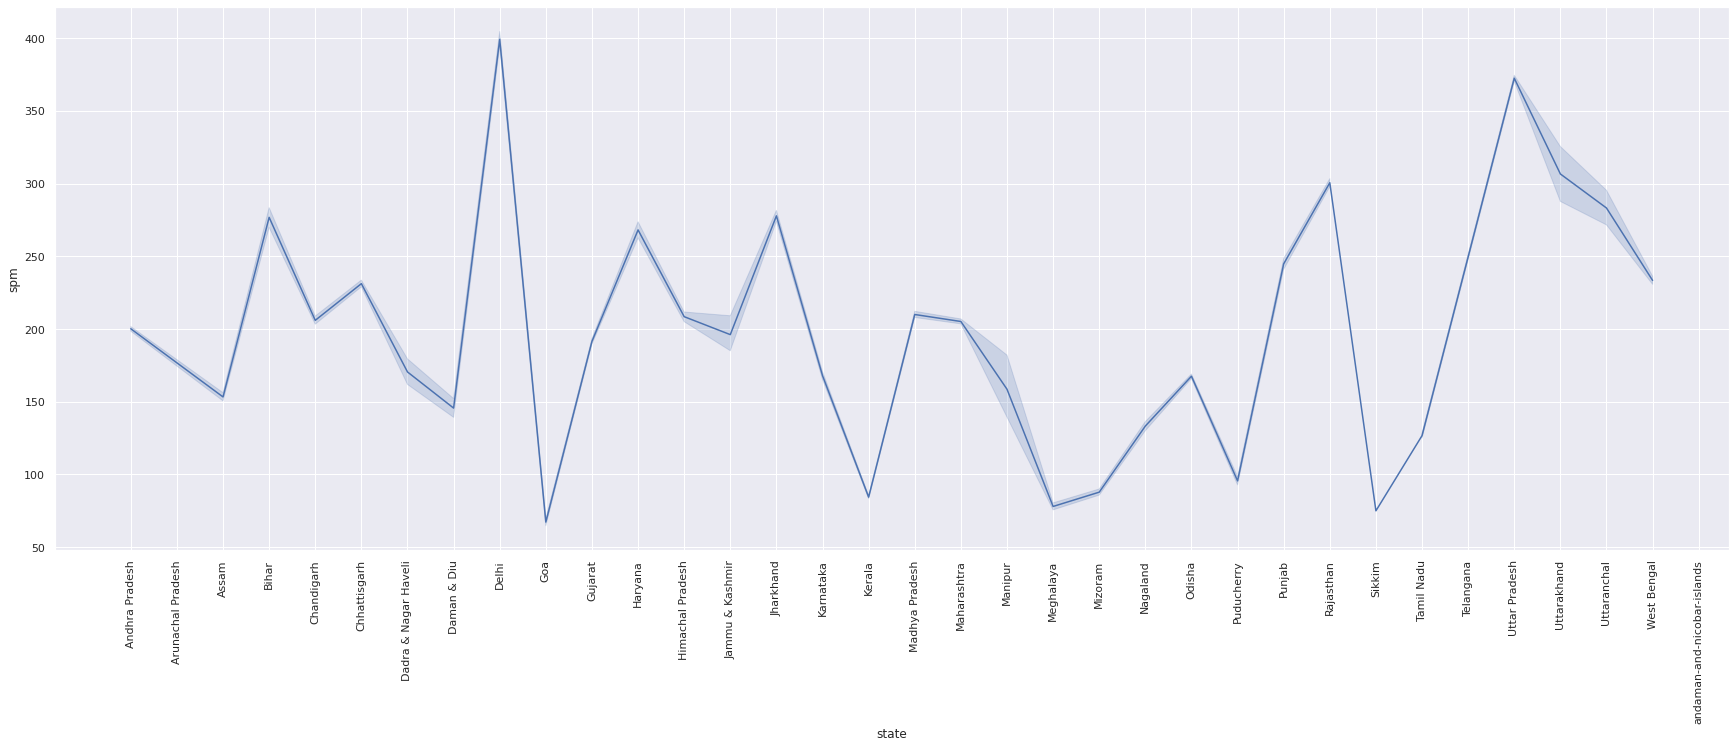

In [40]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.lineplot(x='state',y='spm',data=df);
# Delhi has the highest spm level.

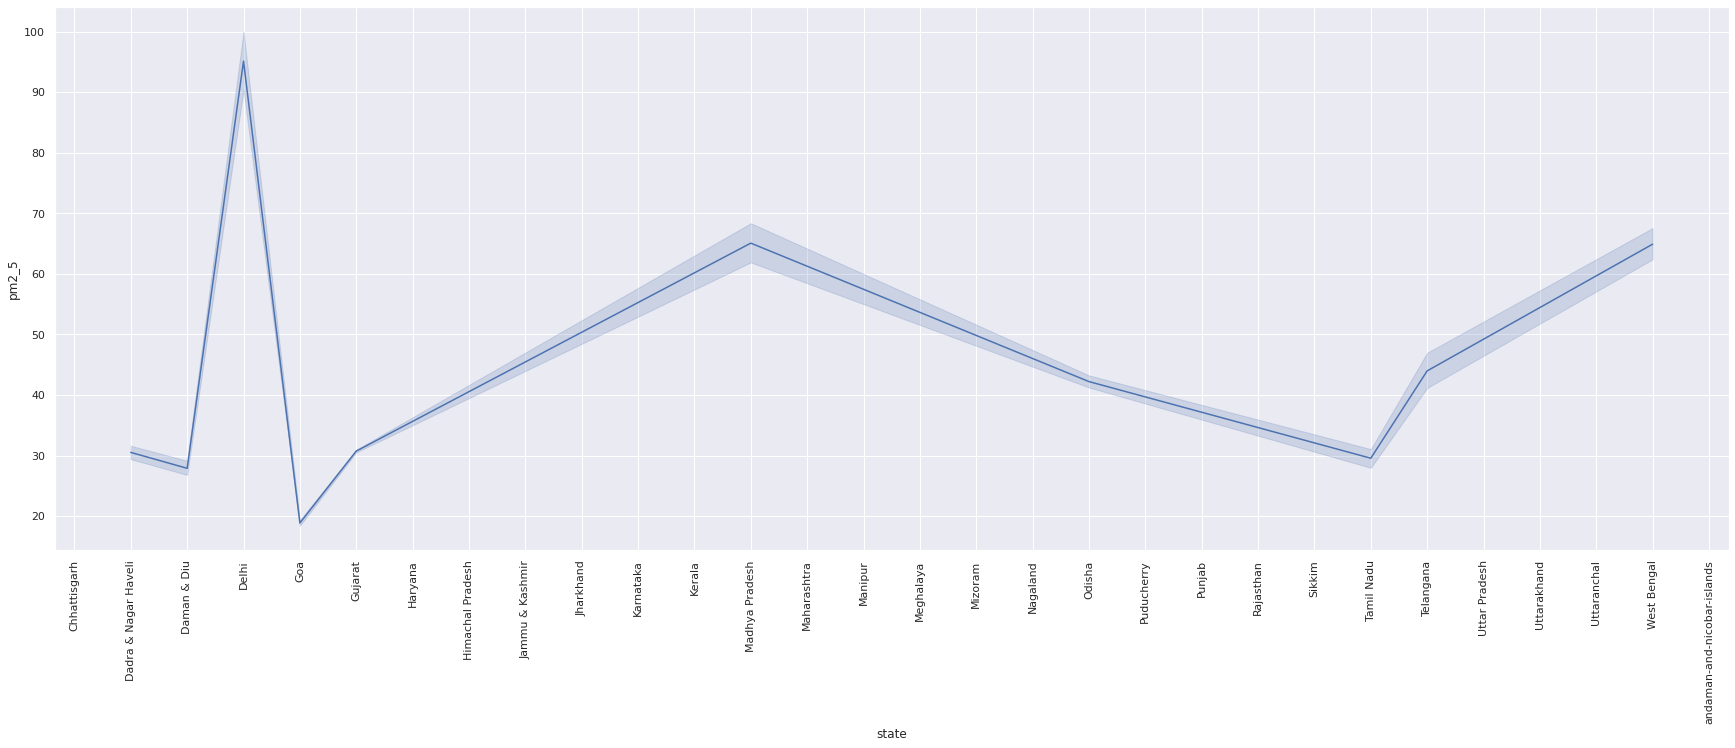

In [41]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.lineplot(x='state',y='pm2_5',data=df);
# Delhi has the highest pm2_5 level.

[]

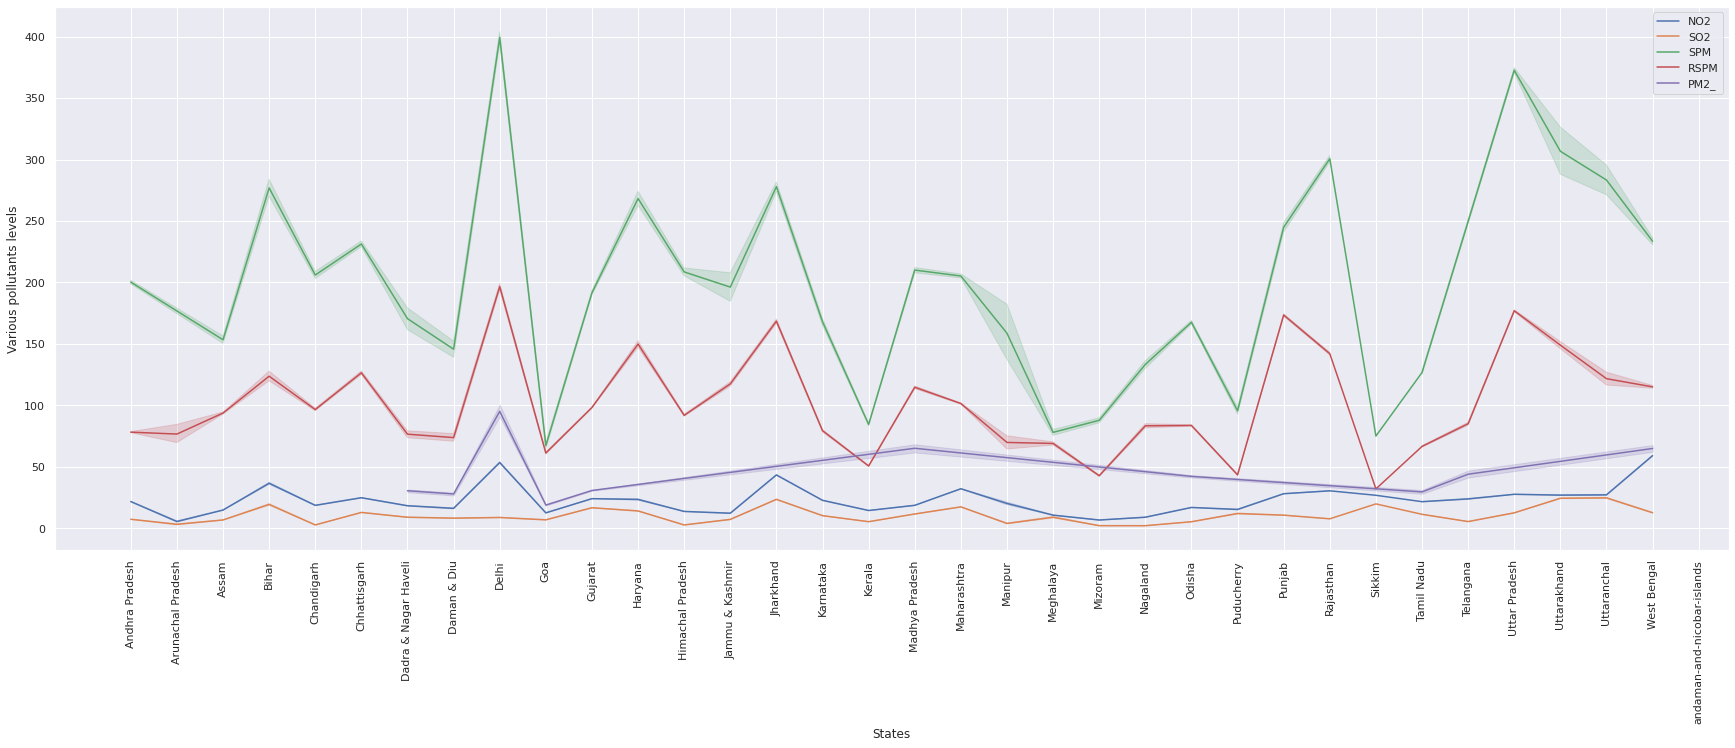

In [42]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Various pollutants levels')
sns.lineplot(x='state',y='no2',data=df,label="NO2")
sns.lineplot(x='state',y='so2',data=df,label="SO2")
sns.lineplot(x='state',y='spm',data=df,label="SPM")
sns.lineplot(x='state',y='rspm',data=df,label="RSPM")
sns.lineplot(x='state',y='pm2_5',data=df,label="PM2_")
plt.plot()

# various pollutants versus states graph with Delhi having the highet pollutant level in air


In [125]:
import plotly.express as px
fig = px.line(df, x = 'pm2_5', y = 'location', title='location wise pm2_5 level')
fig.show()
# location wise pm2_5 level


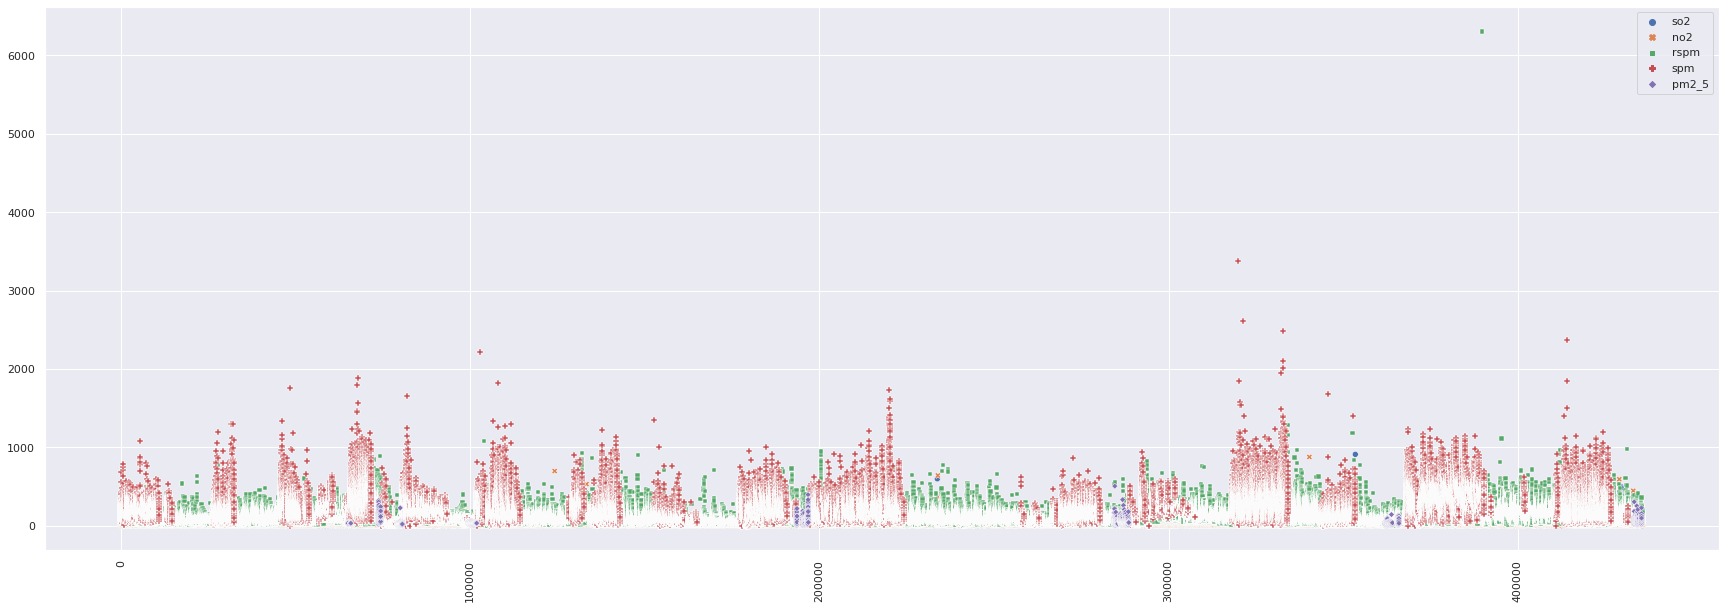

In [64]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.scatterplot(data=df)
# levels of the pollutants 

**Checking all null values and treating those null values.**

In [80]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [81]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [82]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [83]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [84]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000

In [85]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [86]:
df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [87]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [88]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [89]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [90]:
df
# The following features are important for our machine learning models.

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands   Guwahati   
435740                  Lakshadweep   Guwahati   
435741                      Tripura   Guwahati   

                                      type   so2   no2   rspm  spm  pm2_5  
0       Residential, Rural and other Areas   4.8  17.4    0.0  0.0    0.0  
1                          Industrial Area   3.1   7.0    0.0  0.0    0.0  
2       Residential, Rural and other Areas   6.2  28.5    0.0  0.0    0.0  
3       Residential, Rural and other Areas   6.3  14.7    0.0  0.0    0.0  
4                          Industrial Area   4.7   7.5    0.0  0.0    0.0  
...                                    ...   ...   ...    ...  ...    ...  
435737                               RIRUO  22.0  50.0  143.0  0.0    0.0  
435738                               RIRUO  20.0  46.0  171.0  0.0    0.0  
435739  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435740  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  
435741  Residential, Rural and other Areas   0.0   0.0    0.0  0.0    0.0  

[435742 rows x 8 columns]

**CALCULATION OF AQI**

***Function to calculate so2 individiual pollutant index(si)***

In [91]:
# calculating the individual pollutant index for so2(sulphur dioxide)
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()


so2    SOi
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875

***Function to calculate no2 individiual pollutant index(ni)***

In [92]:
# calculating the individual pollutant index for no2(nitrogen dioxide)
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

no2     Noi
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375

***Function to calculate rspm individual poullutant index(rpi)***

In [107]:
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head(20)

rspm  Rpi
0    0.0  0.0
1    0.0  0.0
2    0.0  0.0
3    0.0  0.0
4    0.0  0.0
5    0.0  0.0
6    0.0  0.0
7    0.0  0.0
8    0.0  0.0
9    0.0  0.0
10   0.0  0.0
11   0.0  0.0
12   0.0  0.0
13   0.0  0.0
14   0.0  0.0
15   0.0  0.0
16   0.0  0.0
17   0.0  0.0
18   0.0  0.0
19   0.0  0.0

***Function to calculate spm individual poullutant index(spi)***

In [108]:
# calculating the individual pollutant index for spm(suspended particulate matter)
def cal_SPMi(spm):
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head(20)


spm        SPMi
0     0.0    0.000000
1     0.0    0.000000
2     0.0    0.000000
3     0.0    0.000000
4     0.0    0.000000
5     0.0    0.000000
6     0.0    0.000000
7     0.0    0.000000
8     0.0    0.000000
9     0.0    0.000000
10    0.0    0.000000
11  133.0  122.000000
12   82.0   82.000000
13  111.0  107.333333
14  118.0  112.000000
15  135.0  123.333333
16   80.0   80.000000
17  179.0  152.666667
18   58.0   58.000000
19   99.0   99.000000

***Function to calculate the air quality index (AQI) of every data value***

In [111]:
# Caluclating the Air Quality Index.
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head(20)

state     SOi     Noi  Rpi        SPMi         AQI
0   Andhra Pradesh   6.000  21.750  0.0    0.000000   21.750000
1   Andhra Pradesh   3.875   8.750  0.0    0.000000    8.750000
2   Andhra Pradesh   7.750  35.625  0.0    0.000000   35.625000
3   Andhra Pradesh   7.875  18.375  0.0    0.000000   18.375000
4   Andhra Pradesh   5.875   9.375  0.0    0.000000    9.375000
5   Andhra Pradesh   8.000  32.125  0.0    0.000000   32.125000
6   Andhra Pradesh   6.750  21.375  0.0    0.000000   21.375000
7   Andhra Pradesh   5.875  10.875  0.0    0.000000   10.875000
8   Andhra Pradesh   5.250  28.750  0.0    0.000000   28.750000
9   Andhra Pradesh   5.000  11.125  0.0    0.000000   11.125000
10  Andhra Pradesh   4.500  23.250  0.0    0.000000   23.250000
11  Andhra Pradesh   4.875  17.625  0.0  122.000000  122.000000
12  Andhra Pradesh   7.000  14.750  0.0   82.000000   82.000000
13  Andhra Pradesh   4.125  24.125  0.0  107.333333  107.333333
14  Andhra Pradesh   4.875  10.250  0.0  112.000000  112.000000
15  Andhra Pradesh   4.375  15.125  0.0  123.333333  123.333333
16  Andhra Pradesh   9.875  12.750  0.0   80.000000   80.000000
17  Andhra Pradesh   5.000  12.375  0.0  152.666667  152.666667
18  Andhra Pradesh  15.500  14.375  0.0   58.000000   58.000000
19  Andhra Pradesh   5.000  15.375  0.0   99.000000   99.000000

***Splitting the dataset into Dependant and Independent columns*** 

In [113]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head(20)
# we only select columns like soi, noi, rpi, spmi

SOi     Noi  Rpi        SPMi
0    6.000  21.750  0.0    0.000000
1    3.875   8.750  0.0    0.000000
2    7.750  35.625  0.0    0.000000
3    7.875  18.375  0.0    0.000000
4    5.875   9.375  0.0    0.000000
5    8.000  32.125  0.0    0.000000
6    6.750  21.375  0.0    0.000000
7    5.875  10.875  0.0    0.000000
8    5.250  28.750  0.0    0.000000
9    5.000  11.125  0.0    0.000000
10   4.500  23.250  0.0    0.000000
11   4.875  17.625  0.0  122.000000
12   7.000  14.750  0.0   82.000000
13   4.125  24.125  0.0  107.333333
14   4.875  10.250  0.0  112.000000
15   4.375  15.125  0.0  123.333333
16   9.875  12.750  0.0   80.000000
17   5.000  12.375  0.0  152.666667
18  15.500  14.375  0.0   58.000000
19   5.000  15.375  0.0   99.000000

In [114]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348593, 4) (87149, 4) (348593,) (87149,)


***Linear Regression***

In [116]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [117]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [118]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344789002
--------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495923


***Decision Tree Regressor***

In [119]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [120]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [122]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.1992694252316242e-13
RMSE TestData =  1.300344178822899
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998618754999494


In [123]:
print("The accuracy of this model is: ", (DT.score(X_test,Y_test))*100)

The accuracy of this model is:  99.98618754999494


Made by: Prajukta Dey
Roll number: 21052263
KIIT